### CNNの学習を行うノートブック

ライブラリのimport

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger

パラメータ設定（変更したらCellメニュー→Run All Belowを忘れないこと）

In [15]:
w=56
work_dir='data/dogs_cats'
npy_data_base='dogs_cats-data'
npy_labels_base='dogs_cats-labels'
classes=['dogs','cats']
num_classes=len(classes)

weight_file="dogs_cats-weight-w{0}.hd5".format(w)
model_file="dogs_cats-model-w{0}.json".format(w)
history_file="dogs_cats-history-w{0}.csv".format(w)

train/testデータのnumpy配列ファイルからの読み込みとサイズの確認<br> 
Xは0-1(データ型はfloat16)、yはone-hot encodingにする

In [16]:
mode="train"
npy_data_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_data_base,mode,w)
npy_labels_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_labels_base,mode,w)
X_train=np.load(npy_data_file).astype("float16")
X_train/=255
y_train=np.load(npy_labels_file)
y_train=np_utils.to_categorical(y_train,num_classes)

mode="test"
npy_data_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_data_base,mode,w)
npy_labels_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_labels_base,mode,w)
X_test=np.load(npy_data_file).astype("float16")
X_test/=255
y_test=np.load(npy_labels_file)
y_test=np_utils.to_categorical(y_test,num_classes) #category each animal using 0100, 1000 etc.

print( X_train.shape )
print( y_train.shape )
print( X_test.shape )
print( y_test.shape )
img_rows=X_train.shape[1]  # Image depth 
img_cols=X_train.shape[2]  # Image width 
img_channels=X_train.shape[3]  
print("image_size:", img_rows, img_cols)
print("image_channels:", img_channels)

(2000, 56, 56, 3)
(2000, 2)
(400, 56, 56, 3)
(400, 2)
image_size: 56 56
image_channels: 3


CNNの構築

In [17]:
input_shape=(img_rows,img_cols,img_channels) # tuple of the input_shape  
model=Sequential()
model.add(Conv2D(16, (3,3), activation='relu', padding='same',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.45))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.45))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.45))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.45))
model.add(Flatten()) # Convert to one column data
model.add(Dense(64, activation='relu'))# Fully connected layer of 64 neurons
model.add(Dropout(0.45))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 56, 56, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 28, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        4640      
__________

CNNの学習

In [18]:
%%time
n_epochs=100
val_split=0.2   
batch_size=128
es=EarlyStopping(monitor='val_loss',patience=4,verbose=1)
cl=CSVLogger(history_file)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])
#fit_log=model.fit(X_train, y_train, batch_size=batch_size,
#                  epochs=n_epochs, validation_split=val_split,
#                  callbacks=[cl, es])
fit_log=model.fit(X_train, y_train, batch_size=batch_size,
                  epochs=n_epochs, validation_split=val_split,
                  callbacks=[cl])

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 4s 3ms/step - loss: 0.6813 - acc: 0.5988 - val_loss: 0.7951 - val_acc: 0.0000e+00
Epoch 2/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6653 - acc: 0.6175 - val_loss: 0.7562 - val_acc: 0.0000e+00
Epoch 3/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6538 - acc: 0.6275 - val_loss: 0.7898 - val_acc: 0.0000e+00
Epoch 4/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6485 - acc: 0.6231 - val_loss: 0.8099 - val_acc: 0.0000e+00
Epoch 5/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6515 - acc: 0.6219 - val_loss: 0.7849 - val_acc: 0.0000e+00
Epoch 6/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6509 - acc: 0.6250 - val_loss: 0.7526 - val_acc: 0.0000e+00
Epoch 7/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6461 - acc: 0.6275 - val_loss: 0.7180 - 

Epoch 61/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5325 - acc: 0.7162 - val_loss: 0.4805 - val_acc: 0.8500
Epoch 62/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5279 - acc: 0.7325 - val_loss: 0.3186 - val_acc: 0.9650
Epoch 63/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5309 - acc: 0.7288 - val_loss: 0.4181 - val_acc: 0.8900
Epoch 64/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5365 - acc: 0.7369 - val_loss: 0.3735 - val_acc: 0.9425
Epoch 65/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5318 - acc: 0.7388 - val_loss: 0.3620 - val_acc: 0.9525
Epoch 66/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5257 - acc: 0.7206 - val_loss: 0.5775 - val_acc: 0.7350
Epoch 67/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5278 - acc: 0.7275 - val_loss: 0.2958 - val_acc: 0.9850
Epoch 68/100
1600/1600 [========================

学習経過のグラフ描画

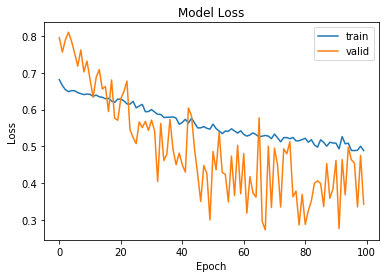

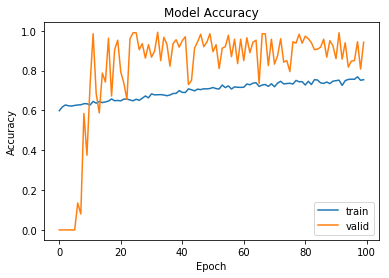

In [19]:
plt.plot(fit_log.history['loss'])
plt.plot(fit_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'], loc='best')
plt.show()

plt.plot(fit_log.history['acc'])
plt.plot(fit_log.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'], loc='best')
plt.show()

学習経過のグラフ描画（このようにhistory_fileから読み出すこともできる）

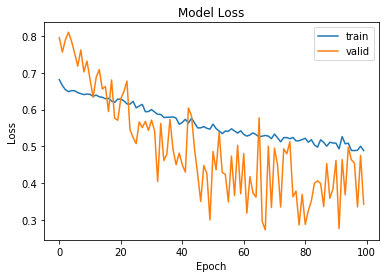

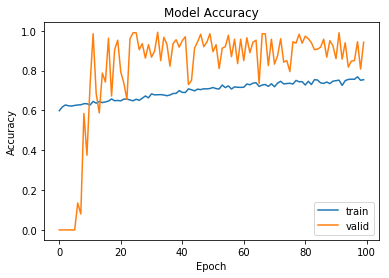

In [20]:
h=np.loadtxt(history_file,delimiter=',',skiprows=1)
epoch=h[:,0]
acc=h[:,1]
loss=h[:,2]
val_acc=h[:,3]
val_loss=h[:,4]

plt.plot(epoch,loss)
plt.plot(epoch,val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'], loc='best')
plt.show()

plt.plot(epoch,acc)
plt.plot(epoch,val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'], loc='best')
plt.show()

テストデータに対する精度(汎化性能の見積もり)

In [21]:
score=model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.5735228538513184
accuracy= 0.7


modelファイルの保存

In [22]:
model.save_weights(weight_file)
json_str=model.to_json()
with open(model_file,"w") as f:
    f.write(json_str)

ok=1
if not os.path.exists(weight_file):
    ok=0
if not os.path.exists(model_file):
    ok=0
if ok==1:
    print("OK")

OK
